In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# import data
my_df = pd.read_csv('data/sample_data_regression.csv')
my_df.head()

,output,input1,input2,input3
0,564,534,536,466
1,182,264,103,244
2,323,272,339,609
3,438,416,444,330
4,547,520,464,104


In [3]:
# split data into input and output objects
X = my_df.drop(['output'], axis = 1)
y = my_df['output']

In [4]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# instantiate model object
regressor = RandomForestRegressor(n_estimators = 1000) # n_estimators represents number of decision trees used

In [6]:
# train model
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [7]:
# assess model accuracy
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2

0.5554568169961775

In [8]:
# feature importance summary
feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)

feature_importance_summary = pd.concat([feature_names, feature_importance], axis = 1)
feature_importance_summary.columns = ['input_variable', 'feature_importance']
feature_importance_summary.sort_values(by = 'feature_importance', inplace = True)

feature_importance_summary

,input_variable,feature_importance
2,input3,0.057827
0,input1,0.439754
1,input2,0.502420


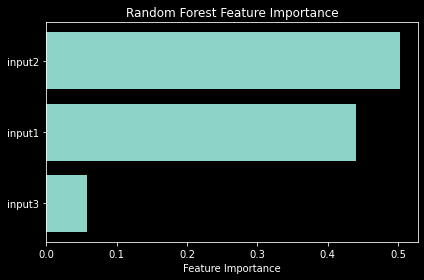

In [10]:
# feature importance bar plot
plt.barh(
    feature_importance_summary['input_variable'],
    feature_importance_summary['feature_importance']
)

plt.title("Random Forest Feature Importance")
plt.xlabel('Feature Importance')
plt.tight_layout()

plt.show()